In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import quandl

In [17]:
data = quandl.get("NSE/INFY")

In [18]:
data.head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2011-06-29,2868.00,2907.00,2868.00,2880.00,2881.75,600094.0,17320.05
2011-06-30,2886.05,2919.00,2881.50,2903.10,2910.45,1417730.0,41163.32
2011-07-01,2935.00,2969.95,2924.10,2928.00,2934.15,800308.0,23549.85
2011-07-04,2966.65,2977.00,2935.00,2941.00,2938.95,514324.0,15162.29
2011-07-05,2957.00,2969.90,2926.00,2959.00,2956.45,802966.0,23701.22
2011-07-06,2947.00,2972.45,2937.10,2954.50,2953.70,430028.0,12701.30
2011-07-07,2955.20,3000.00,2943.00,2998.00,2995.70,718934.0,21388.82
2011-07-08,3000.00,3023.90,2967.25,2967.25,2976.55,708724.0,21245.90
2011-07-11,2953.90,2976.10,2888.55,2926.35,2921.15,1150815.0,33571.22


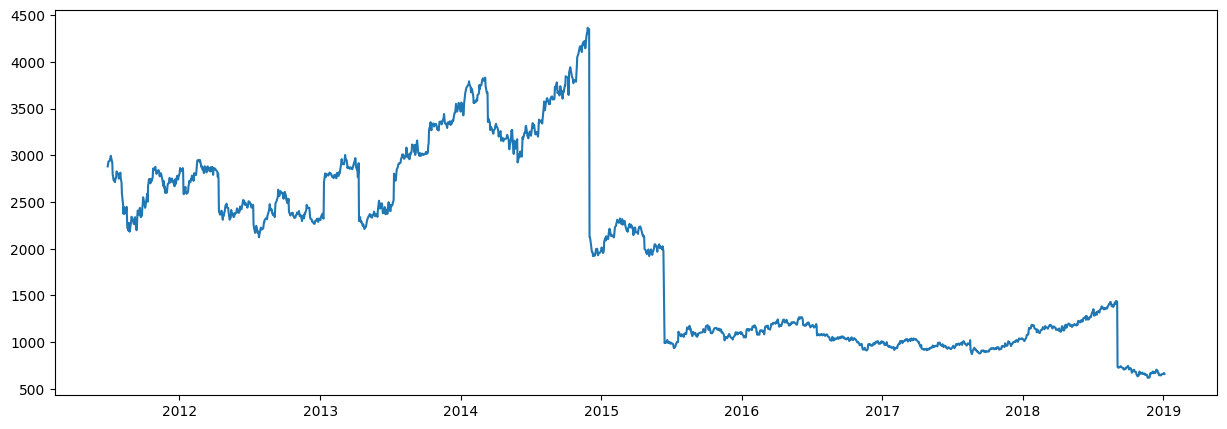

In [23]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'],label='closing_price')

In [26]:
data = data.dropna(subset=['Close'])

In [28]:
data['open_close_dif']=data['Open']-data['Close']
data['high_low_dif']=data['High']-data['Low']
data.dropna()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),open_close_dif,high_low_dif
Date,,,,,,,,,
2011-06-29,2868.00,2907.00,2868.00,2880.00,2881.75,600094.0,17320.05,-13.75,39.00
2011-06-30,2886.05,2919.00,2881.50,2903.10,2910.45,1417730.0,41163.32,-24.40,37.50
2011-07-01,2935.00,2969.95,2924.10,2928.00,2934.15,800308.0,23549.85,0.85,45.85
2011-07-04,2966.65,2977.00,2935.00,2941.00,2938.95,514324.0,15162.29,27.70,42.00
2011-07-05,2957.00,2969.90,2926.00,2959.00,2956.45,802966.0,23701.22,0.55,43.90
...,...,...,...,...,...,...,...,...,...
2018-12-31,660.00,662.00,655.80,659.60,658.95,3373319.0,22239.20,1.05,6.20
2019-01-01,660.95,666.30,654.15,665.95,665.05,2943390.0,19445.79,-4.10,12.15
2019-01-02,666.00,674.00,662.05,668.00,669.05,7416655.0,49689.63,-3.05,11.95


In [29]:
new_data=data[['open_close_dif','high_low_dif']]
new_data.head()

,open_close_dif,high_low_dif
Date,,
2011-06-29,-13.75,39.00
2011-06-30,-24.40,37.50
2011-07-01,0.85,45.85
2011-07-04,27.70,42.00
2011-07-05,0.55,43.90


In [30]:
#if next data is greater than todays close value 1(buy) else -1(sell)
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1) 

In [31]:
Y

array([ 1,  1,  1, ...,  1, -1, -1])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_data,Y,test_size=0.30)

In [35]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#good value of k(no. of neighbours) can be found  using gridsearch
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

model.fit(X_train,y_train)

accuracy_train=accuracy_score(y_train,model.predict(X_train))
accuracy_test=accuracy_score(y_test,model.predict(X_test))

print('Train_data Accuracy:%.2f' %accuracy_train)
print('Test_data Accuracy:%.2f' %accuracy_test)

Train_data Accuracy:0.66
Test_data Accuracy:0.48


In [38]:
predictions=model.predict(X_test)

In [39]:
predicted_data=pd.DataFrame({'Actual class':y_test,'Predicted class':predictions})

In [40]:
predicted_data.head(20)

,Actual class,Predicted class
0,-1,-1
1,1,-1
2,1,1
3,-1,1
4,1,1
5,1,-1
6,1,1
7,-1,1
8,1,-1
9,1,-1


In [36]:
y=data['Close']

In [37]:
y

Date
2011-06-29    2881.75
2011-06-30    2910.45
2011-07-01    2934.15
2011-07-04    2938.95
2011-07-05    2956.45
               ...   
2018-12-31     658.95
2019-01-01     665.05
2019-01-02     669.05
2019-01-03     669.15
2019-01-04     661.05
Name: Close, Length: 1863, dtype: float64